### Danish fire insurance claims:

EVT from [here](https://www.youtube.com/watch?v=eUWlzAQfgFw&t=472s):

In [ ]:
install.packages('evir')
library('evir')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



First of all, plotting and getting summary statistics:

[1] 1.683748 2.093704 1.732581 1.779754 4.612006 8.725274

[1] 2167

 num [1:2167] 1.68 2.09 1.73 1.78 4.61 ...
 - attr(*, "times")= POSIXt[1:2167], format: "1980-01-03" "1980-01-04" ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.321   1.778   3.385   2.967 263.250 

[1] 8.507452

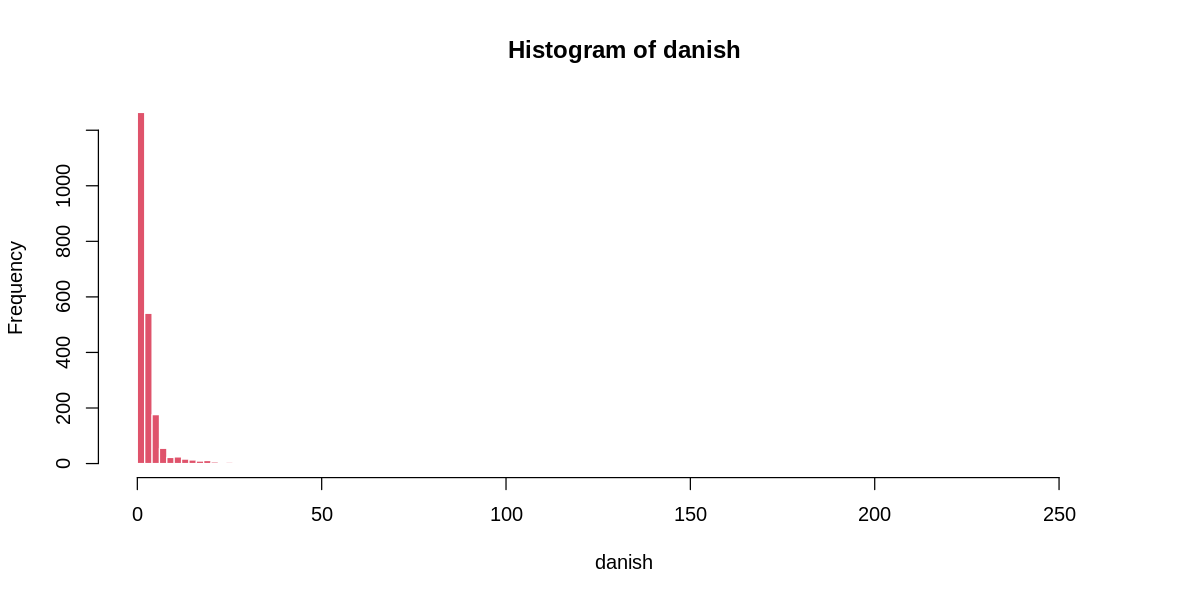

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)

data(danish)
head(danish)
length(danish)
hist(danish, border=F, breaks=100, col=2)
str(danish)
summary(danish)
sd(danish)

An exponential q-plot will be the first test to check at the tails:

Data from the normal distribution will be convex:



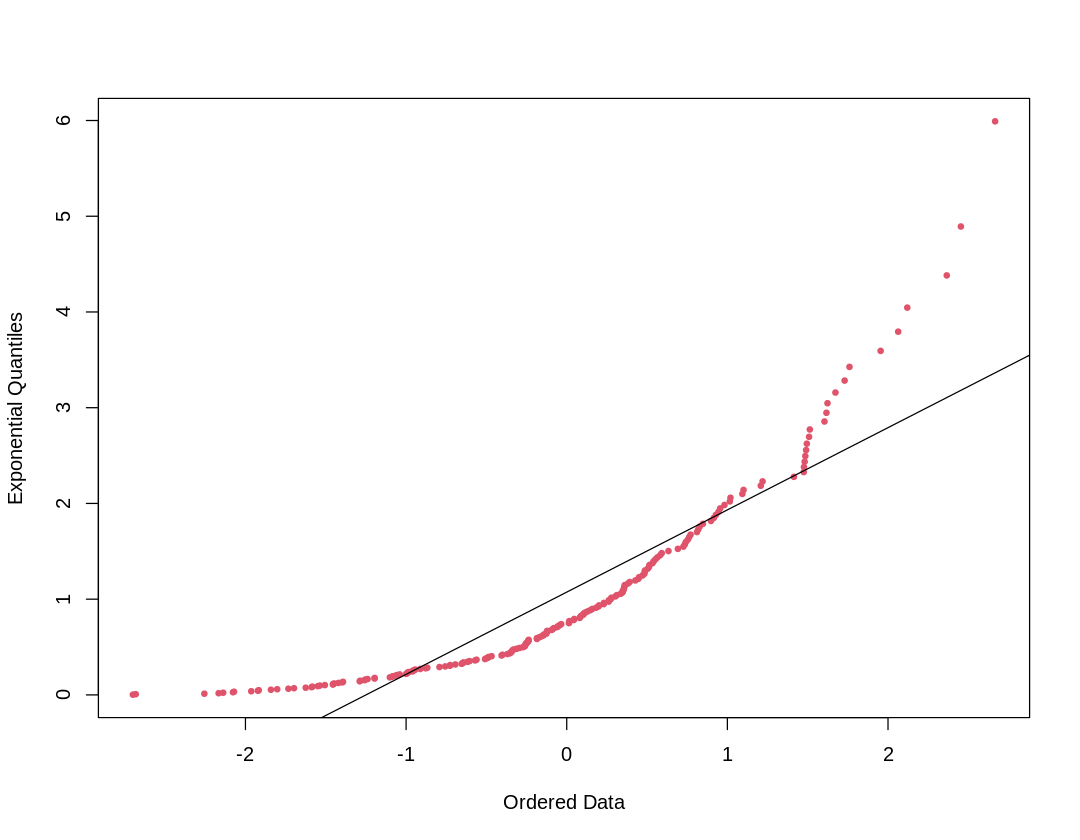

In [ ]:
set.seed(2021)
options(repr.plot.width=9, repr.plot.height=7)

s = rnorm(200)
qplot(s, xi=0, pch=19, col=2, cex=.6)

The convexity of the plot (looking from below at the graph) suggests tails lighter than the exponential, which is the case in the normal. Predictably a straight line will result with exponential data:

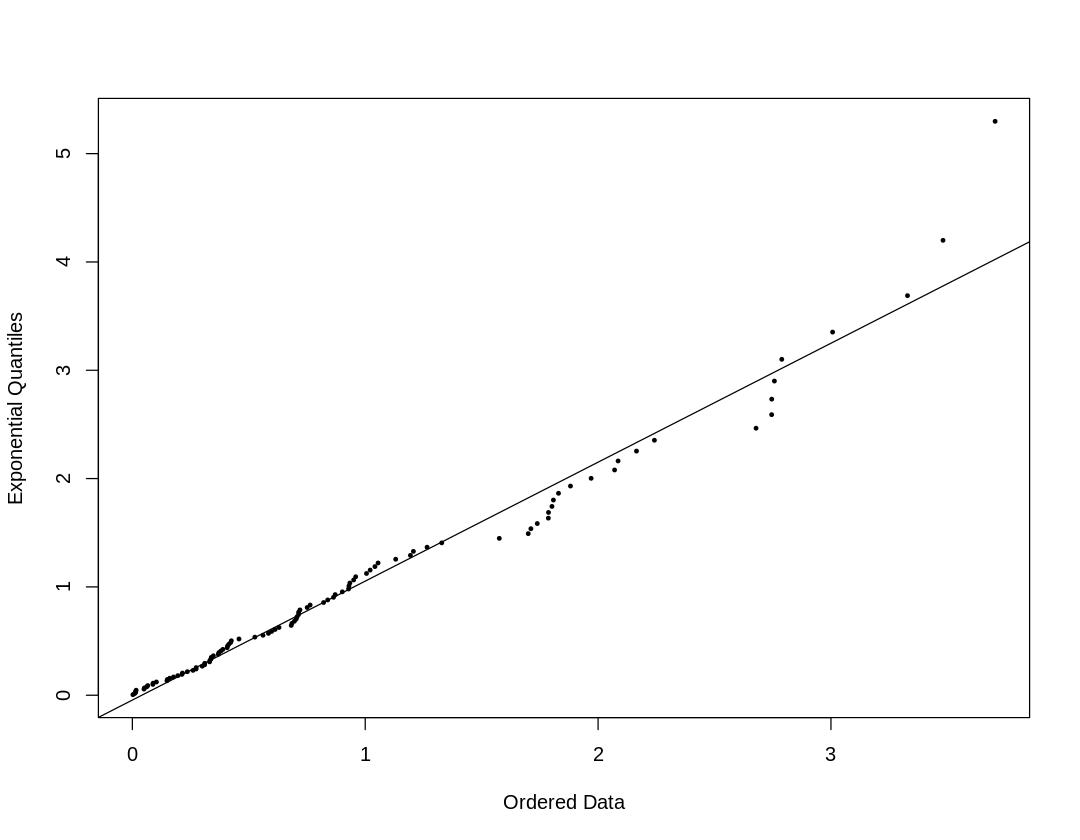

In [ ]:
options(repr.plot.width=9, repr.plot.height=7)
qplot(rexp(100), xi=0, pch=19, cex=.4)

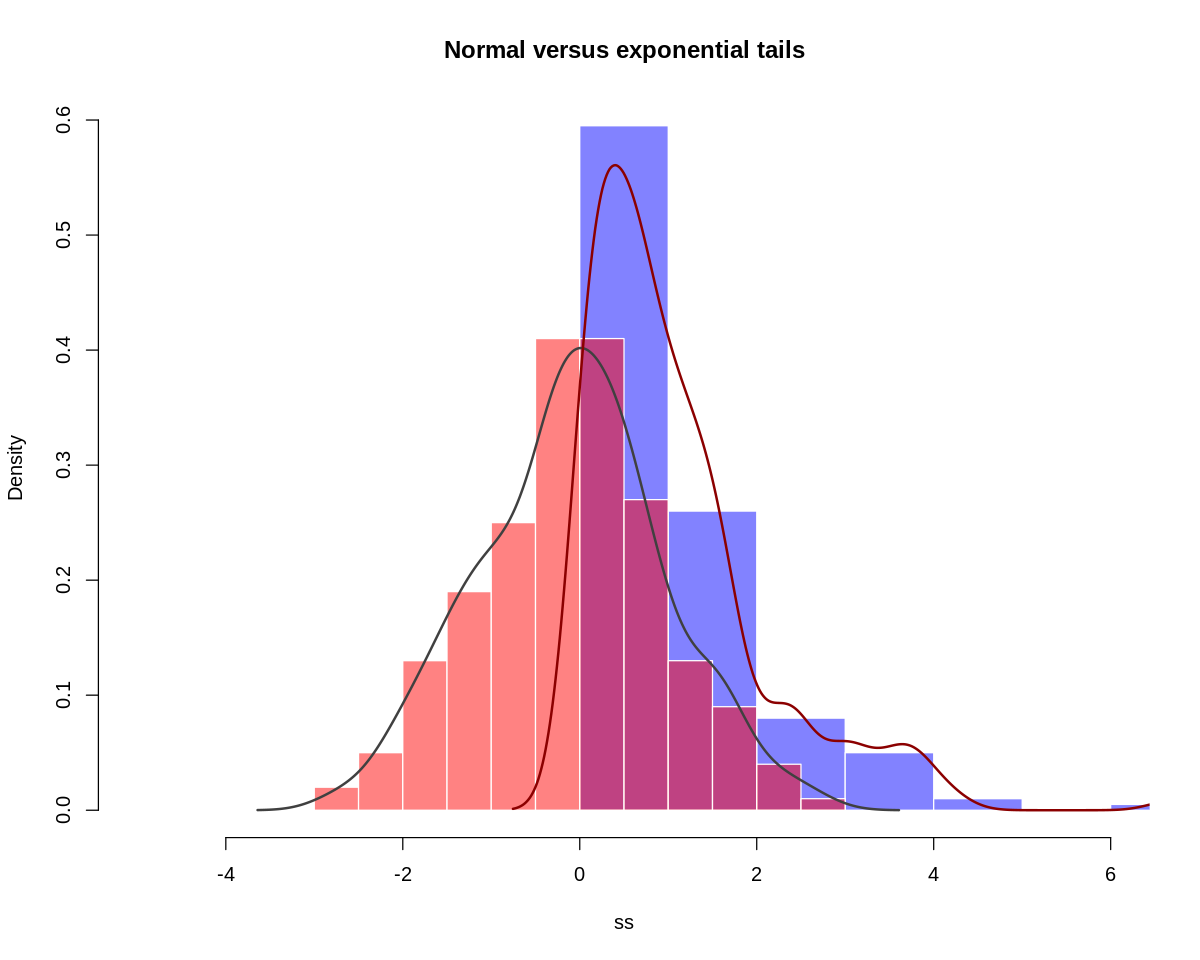

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)

ss = rexp(200)

hist(ss, prob=T, col=rgb(0, 0, 255, max = 255, alpha = 125), xlim=c(-5,6), border=F, main="Normal versus exponential tails")
hist(s,prob=T, add=T, border=F, col=rgb(255, 0, 0, max = 255, alpha = 125))

lines(density(s), col="gray25", lwd=2)
lines(density(ss), col="red4", lwd=2)

The Danish insurance dataset is concave. Concavity is a sign of heavy tails.

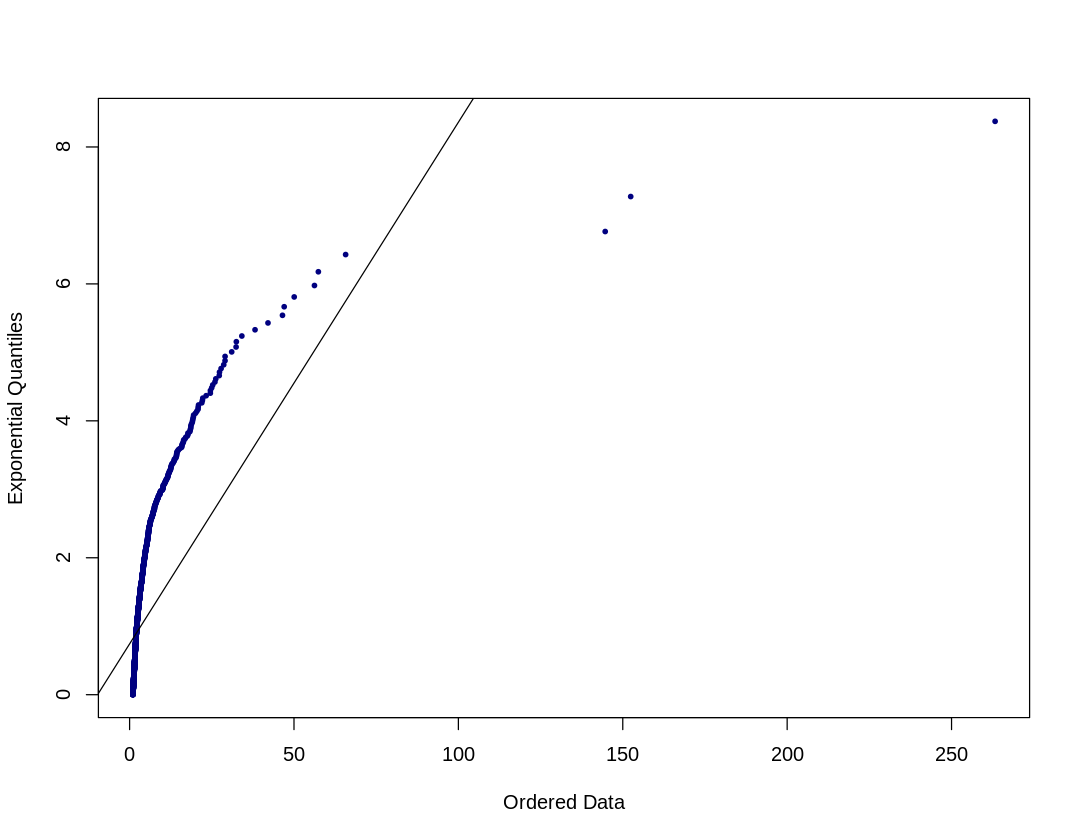

In [ ]:
options(repr.plot.width=9, repr.plot.height=7)
qplot(danish, xi=0, pch=19, cex=.5, col='navyblue')

The extreme concavity (looking from below) of the plot is a strong signal of heavy tails.

The plot can be duplicated "manually" as follows:

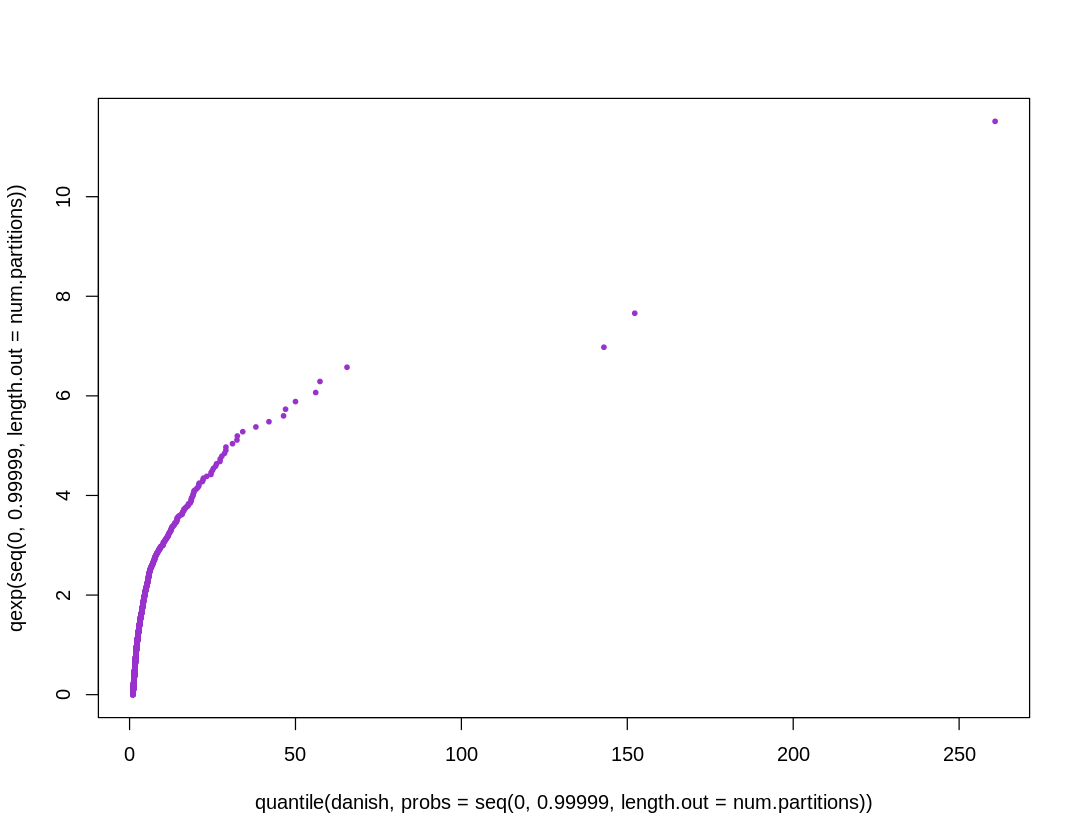

In [ ]:
num.partitions <- round(1 * length(danish))

plot(quantile(danish,probs = seq(0,0.99999,length.out=num.partitions)),
     qexp(seq(0,0.99999,length.out=num.partitions)),
     pch=19, cex=.5, col='darkorchid')

Once we get a strong signal of heavy tails (concavity in the exponential Q-Q plot), we look for fat tails.

The Zipf plot will give us information on the survival function.

A linear plot will suggest that the data is distributed like a Pareto, i.e. fat tails, not just heavy tails.

It detects power-law decay at the tail. It is a necessary condition, but not sufficient. If there is no linearity, we rule out fat tails, but the lognorm distribution can look very similar to the linear plot of a Pareto.

The Zipf plot is a log-log plot of the empirical survival function of our data.

It comes from the observation that in a Pareto

$\bar F(x) = \left(\frac{x}{x_0} \right)^{-\alpha},\quad 0<x_0\leq x \implies \log(\bar F(x))= \alpha \log(x_0) - \alpha \log(x).$

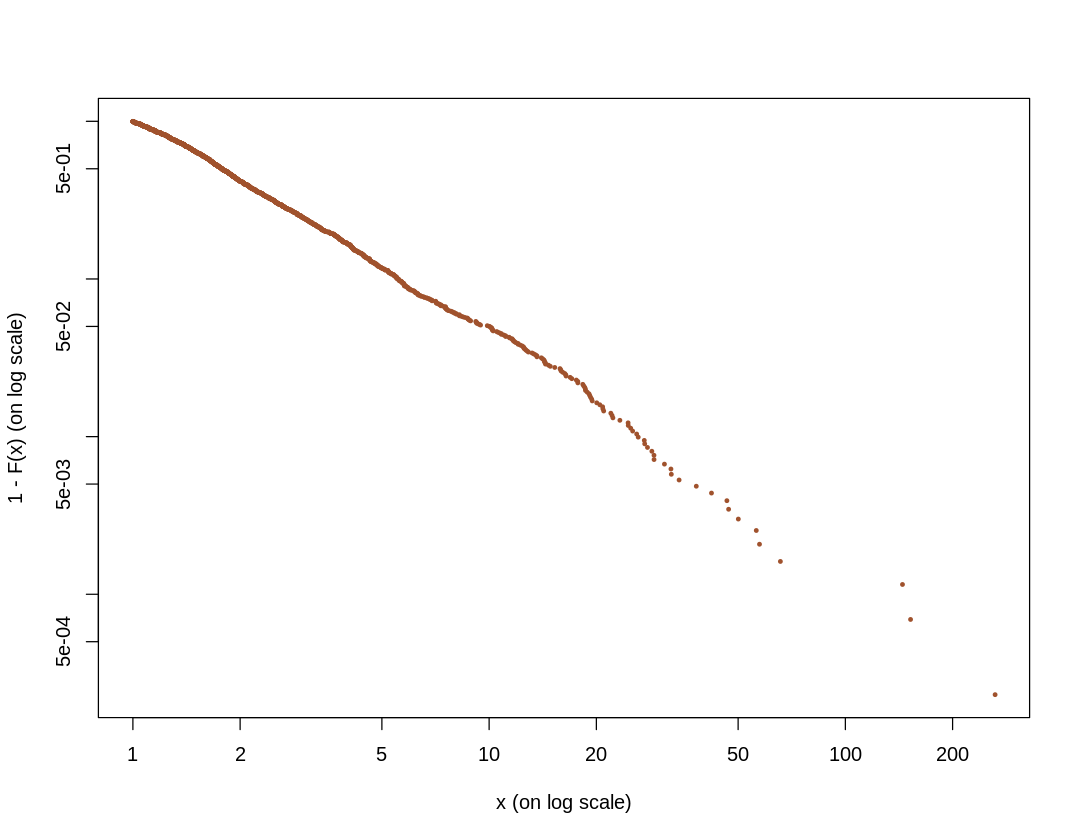

In [ ]:
# Here is the Zipf plot of the log of the data (x) and the empirical survival (y)
options(repr.plot.width=9, repr.plot.height=7)

emplot(danish, 'xy', pch=19, col='sienna', cex=.4) #'xy' means that they are both logarithmic.

But the Zipf plot is not enough.

The MEF (Mean Excess Function) of a rv $X$ with a cdf $F$ is

$$e(v) = \mathbb E\big[X-v \mid X>v \big]= \frac{ \displaystyle \int_v^\infty (t-v) dF(t)}{\displaystyle \int_v^\infty dF(t)}$$

So it is the expected value of the all the observations above a threshold $v$ rescaled by the threshold.

Note that there has to be a finite mean (expectation), which only happens when the alpha value of the Pareto is above 1.

The **Meplot** will yield a plot consistent with the Wijk's law (**the mean excess function of a Pareto grows linearly with the threshold**). Another signal of fat tails.



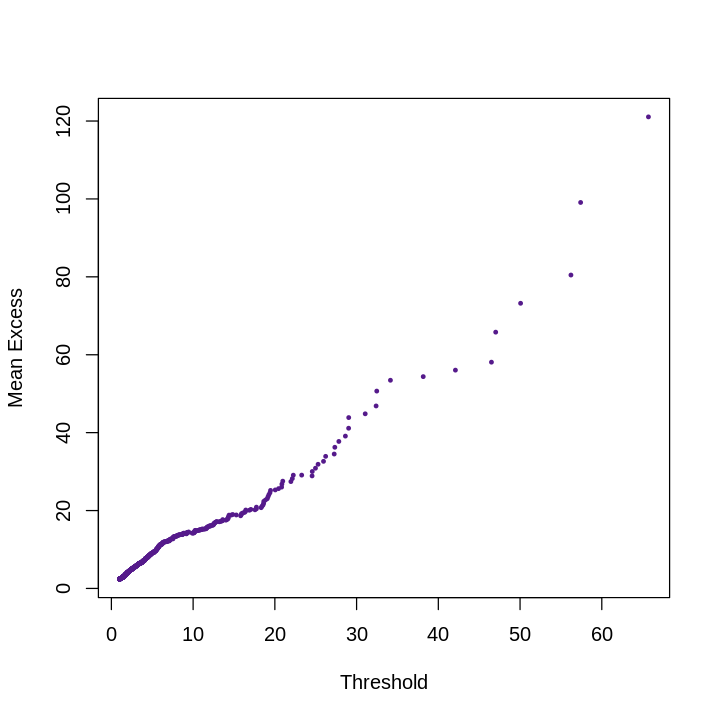

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)

meplot(danish, pch=19, col='purple4', cex=.4)

Next, the concentration profile (CP):


In [ ]:
install.packages('ineq')
library('ineq')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



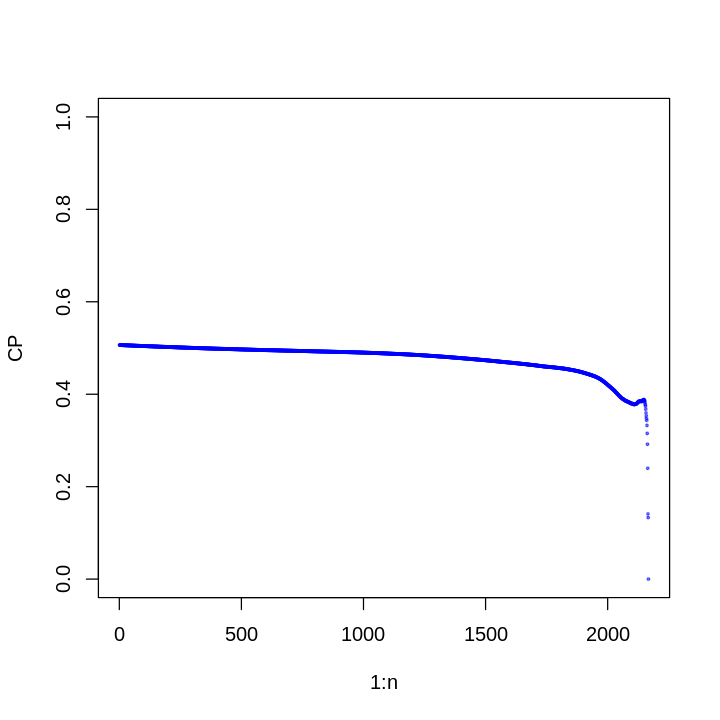

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
sort_danish = sort(danish)
n=length(danish)
CP=c()
for (i in 1:n) CP[i]=ineq(sort_danish[i:n], type='Gini')

plot(1:n,CP,ylim=c(0,1),pch=19, cex=.3, col=rgb(0, 0, 100, max = 100, alpha = 50))

From [here](https://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm):

$$G=\frac{\sum_{i=1}^n\sum_{j=1}^n\vert x_i - x_j \vert}{2n^2 \bar x}$$

or If the x values are first placed in ascending order, such that each x has rank i, the some of the comparisons above can be avoided and computation is quicker:

$$G=\frac{2}{n^2 \bar x}i\sum_{i=1}^n x_i - \bar x $$


In [ ]:
# # Here is the "manual" calculation. It takes several minutes to compute!
# # To un-comment or comment the cell, select all lines and press Ctrl /

# v = sort(danish, decreasing = FALSE) # Places in order the actual entries in the vector 'danish' from smaller to larger.

# n = length(danish) # 2167 claims

# CP <- rep(0,n)     # Empty vector to collect Gini index for every progressively more extreme segment of v.
# for (i in 1:n){    # We will chop off the vector v in 2167 spots from left to right, keeping only the values to the r each time.
#       mat <- matrix(0, n-i+1 , n-i+1) # Each string to be Gini measured and the results stored in a matrix of size (n - i + 1)^2.
#         for (j in 1:(n-i+1)){         # We will fill in the matrix one row at a time, each row indexed by j.
#          mat[j,] <- abs(v[i+j-1] - v[i:n]) # This takes the diffence between each element to the right of the i-th entry, starting at i
#                                            # ... and the entire string of elements to the right of the i-th position in v. Abs. values.
#            }
#        CP[i] <- sum(mat) / (2 * (n-i+1)^2 * mean(v[i:n])) # This calculates the Gini index for each submatrix.
# }

# plot(1:n,CP,ylim=c(0,1),pch=19, cex=.3, col=rgb(50, 0, 50, max = 100, alpha = 50))

In [ ]:
# # For an "under-the-hood" view of what this does, here is the same calculation on a sort vector, printing intermediate steps:

# set.seed(0)

# v = round(runif(3,2,35))
# v
# n = length(v)

# CP <- rep(0,n)
# for (i in 1:n){
#   mat <- matrix(0, n-i+1 , n-i+1)
#   for (j in 1:(n-i+1)){
#     mat[j,] <- abs(v[i+j-1] - v[i:n])
#     print(mat)
#   }
#   CP[i] <- sum(mat) / (2 * (n-i+1)^2 * mean(v[i:n]))
#   print(CP)
# }

This constant concentration profile (except at the margin) is typical of Pareto distributions.

To analyze the moments we can use the function MS.

The ratio of maximum-to-sum for a particular moment $k$ will converge a.s. to $0$ if the moement is finite:

For an iid sequence $X_1,\dots,X_n$

$$S_n(k)=\sum_1^n \vert X_i \vert^k$$

$$M_n(k) =\max_{i\in\{1,\dots, n\}}(\vert X_i \vert^k)$$

will result in

$$R_n(k)=\frac{M_n(k)}{S_n(k)}$$

by the LLN, $R_n(k) \to 0$ if $\mathbb E(X^k)<\infty.$

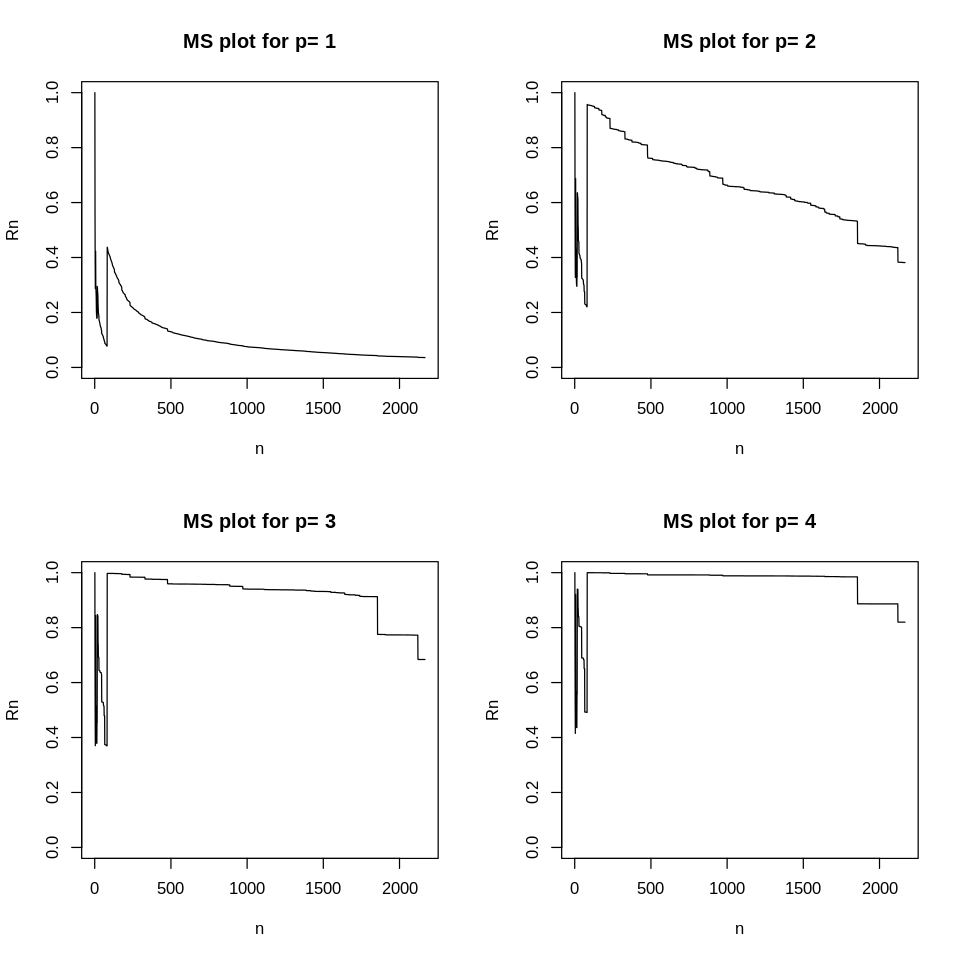

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
MSplot <- function(data, p=4){
  par(mfrow=c(2,2))
  x=abs(data)
  for(i in 1:p){
    y=x^i
    S=cumsum(y)
    M=cummax(y)
    R=M/S
    plot(1:length(x),R,type='l',ylim=c(0,1), xlab='n',ylab='Rn',main=paste('MS plot for p=',i))
  }
  par(mfrow=c(1,1))
}
MSplot(danish)

This shows convergence only for the first of the 4 first moments. This suggests a fat tailed distribution. This means, for instance, that the SD calculated above is useless for inference.

The Hill plot will confirm this, expecting an alpha between 1 and 2, or a $\xi$ ($1/\alpha$) smaller than 1 but bigger than 0.5. Why?

Because a Pareto will have infinite theoretical mean if $\alpha <1,$ with a finite mean if the parameter $\alpha >1.$ Now, the Pareto will have infinite theoretical variance if $\alpha < 2,$ but finite variance if $\alpha >2,$ and so forth. This is explained [here](https://youtu.be/3L2kVOUEtqw?t=354).

---

The Hill estimator is meant to produce the parameter $\alpha = \frac 1 \xi$ through MLE. The Pareto distribution models $F(X>x \mid x >u),$ and

$$F(x)=1 -cx^{-\gamma}$$

with density

$$f(x)=\gamma cx^{-\gamma -1}$$

The conditional pdf is

$$f(x \mid x>s) =\frac{\gamma cx^{-\gamma -1}}{\Pr(x>s)}=\frac{\gamma cx^{-\gamma -1}}{1-F(s)}=\frac{\gamma cx^{-\gamma -1}}{cs^{-\gamma}}=\gamma \left(\frac x s\right)^{-\gamma}x^{-1}$$

with the MLE given by

$$\frac{∂f}{∂ γ} =\frac 1 γ − \ln \frac x s = 0 ⇒ \frac 1 {\hat γ}= \ln x − \ln s.$$

Finally, $x$ is replaced by the average of all losses exceeding $s,$ in order to have the
estimation more robust. Denoting the sorted values of $X_1, X_2, . . .$ (in descending order) by $X_{(1)}, X_{(2)},. . .$ and denoting by $k$ the index of the lowest observation exceeding $s,$ one has

$$\frac 1{ \hat γ_k}= \frac 1 k \sum_{i=1}^k \ln X_{(i)} − \ln s.$$

This is all found [here](http://www.iam.fmph.uniba.sk/institute/jurca/qrm/Chapter4.pdf).

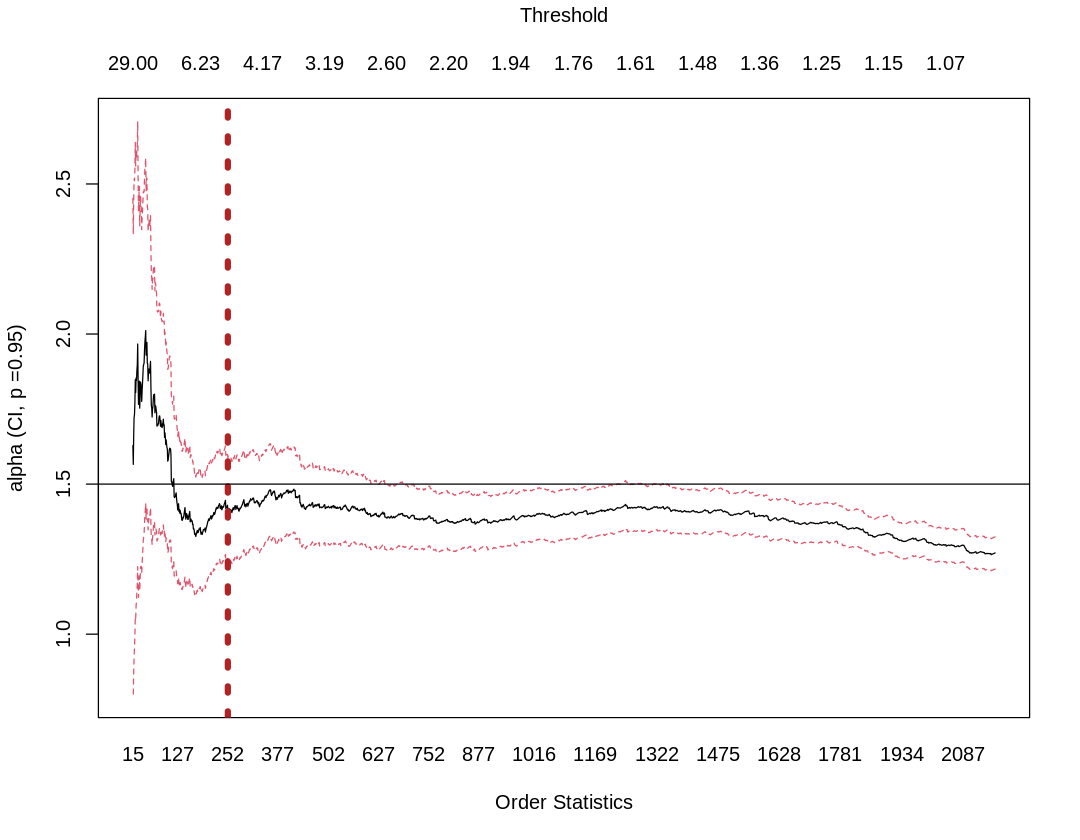

In [ ]:
options(repr.plot.width=9, repr.plot.height=7)

hill(danish)
abline(v=252, col='firebrick', lty=3, lwd=5)
abline(h=1.5) # The alpha parameter is around 1.5
# The stability starts at a threshold of 5.5 (Look at the top).

The $\xi=1/\alpha$ or $1/1.5 = 0.6$

A value of alpha around 1.5 is highly plausible looking at the plot. The stability
seems to kick in around a threshold of $5.5$ (look at the numbers on top or dashed red line). In terms if $\xi$ we expect about $1/1.5,$ that is $0.6.$

The 5.5 threshold seems compatible with both the Zipf plot and the meplot. About 10% of all the claims lie above the threshold:

In [ ]:
mean(danish>  5.5)

[1] 0.1019843

Let us **fit a GPD above such a threshold**. If the fit is reliable, the tail parameter should be stable under higher thresholds.

Trying to fit a generalized Pareto:

In [ ]:
fit = gpd(danish, 5.5) # 5.5 is the threshold in the POT model.
tail(fit)

0.01419759,-0.04259004
-0.04259004,0.32083219


We get a xi = 0.6 which is significant because the se is 0.12. The beta of 4.3 is also significant. Why? Because we only need to compare the estimates to their SE, and remember that MLE (behind gpd function) gives asymptotically normal estimators.

! $\beta$ beta is the scale parameter!

! $\mu$ is the location parameter.

This is found [here](https://cran.r-project.org/web/packages/evir/evir.pdf).

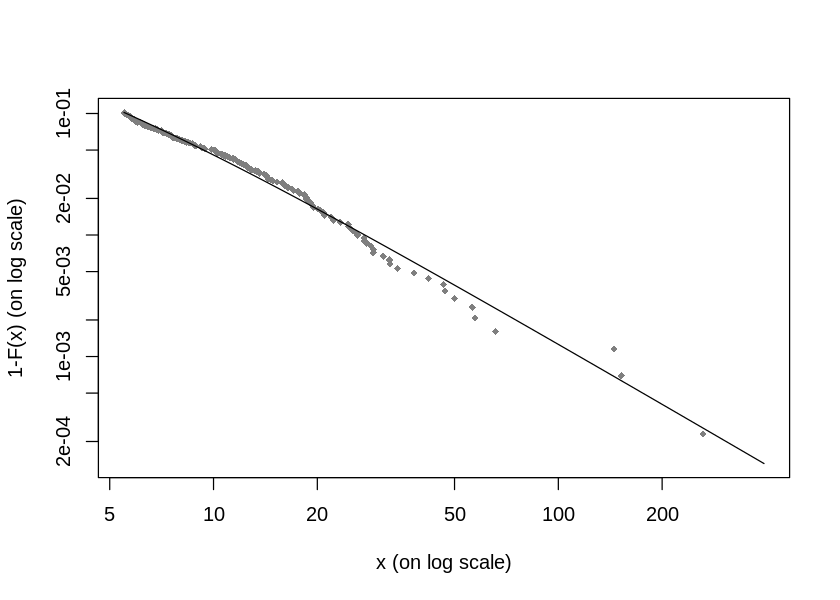

In [ ]:
options(repr.plot.width=7, repr.plot.height=5)

tailplot(fit, pch=18, cex=.8, col='gray50')

Note that plot(fit) does not work on Jupyter because it wants to launch an interactive menu, but it does when run in RStudio. Here is the output in this case:

<img src="https://user-images.githubusercontent.com/9312897/120120269-194b6e00-c16a-11eb-93c7-b3233a558975.png" width="700" height="600" />

The residuals need to be exponentially distributed for the GPD.



The fitting is quite satisfactory.

Would a higher threshold change the value of xi?

In [ ]:
gpd(danish,20)$par.ests[1]
gpd(danish,20)$par.ses[1]

xi 
0.6840479

xi 
0.2749542

Qualitatively we would say no: a higher threshold preserves the xi.

A value of 0.6 or so seems plausible and in line with our previous findings.
Notice that it is confirmed that the second moment is not finite!

Given the GPD fit, we could be interested in estimating a very high quantile (VaR) and the corresponding ES. This approach is much more reliable than using empirical estimates, especially under fat tails.

We can rely on a useful function in the `evir` package. The function requires a GPD fit in its arguments.

Let us start from a 99% confidence level.

The VaR is the $\alpha$ quantile of the loss distribution $L$ (be it a normal, lognormal, or just the empirical distribution out of the data) for which

$$\text{VaR}_\alpha(L) =\min\{l\in \mathbb R: \Pr(L\geq l) \leq 1 - \alpha\}$$

Losses are treated with a positive sign.

$\alpha$ is the confidence level for the calculated losses. Typical values are $\alpha =0.95:$ this means that $95\%$ of the expected losses are below that quantile. Only $5\%$ of the losses will be larger.

But how larger is not captured. The **expected shortfall** is the expected value of the losses above the level alpha. By definition it is larger than the VaR.

$$\text{ES}_\alpha = \mathbb E\left[L \mid L \geq \text{VaR}_\alpha \right]$$

p,quantile,sfall
0.99,27.46474,71.70779


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.321   1.778   3.385   2.967 263.250 

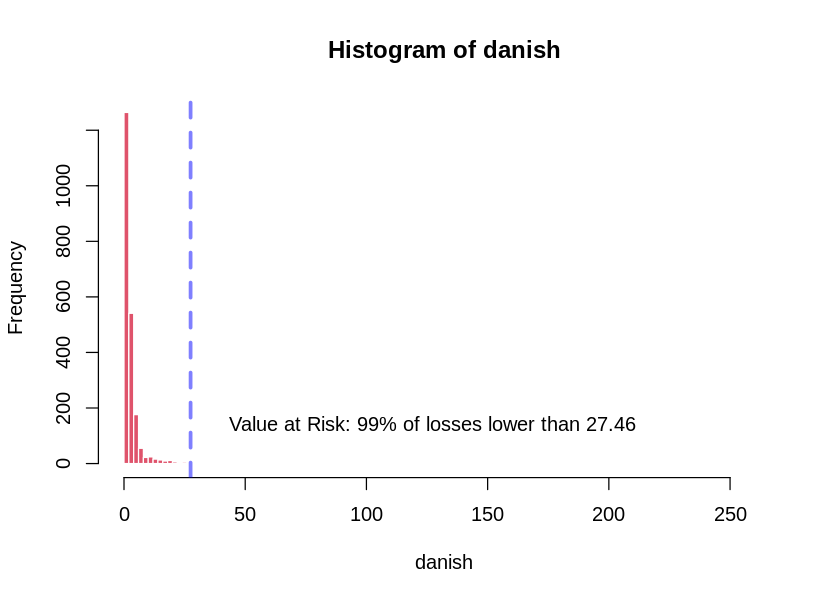

In [ ]:
riskmeasures(fit,0.99)
VaR <- riskmeasures(fit,0.99)[2]
summary(danish)
hist(danish, border=F, breaks=100, col=2)

legend(VaR,200, paste("Value at Risk: 99% of losses lower than",round(VaR,2)), box.lwd=0)
abline(v=VaR, col=rgb(0,0,1,.5), lwd=3, lty=2)

The empirical counterparts are

In [ ]:
quantile(danish, 0.99) #99% Var
mean(danish[danish>=quantile(danish,0.99)]) #99% ES

99% 
26.04253

[1] 58.58575

So $27.5$ versus $26,$ and $71.7$ versus $55.5.$

While the VaR is comparable, the empirical ES seems to underestimate the tail risk.

Let us consider the so-called worst-case scenario, i.e. quantities at the 99.9% confidence level.

In [ ]:
riskmeasures(fit,0.999)

p,quantile,sfall
0.999,115.1248,292.3878


Notice that the empirical quantities, ignoring EVT, would make us underestimate the tail risk even more.

In [ ]:
quantile(danish,0.999) #99.9% Var
mean(danish[danish>=quantile(danish,0.999)]) #99.9% ES

99.9% 
131.5519

[1] 186.7737

Notice that in this case also the empirical VaR is less reliable.

And for 99.99? We are really zooming into the tail here. Empirically it is like we are considering less than 1 observation in the sample!

In [ ]:
riskmeasures(fit,0.9999)
quantile(danish,0.9999) #99.99% Var
mean(danish[danish>=quantile(danish,0.9999)]) #99.99% ES

p,quantile,sfall
0.9999,466.3411,1176.558


99.99% 
239.243

[1] 263.2504

Oops! EVT definitely wins.

Two useful functions I also suggest to check are `gpd.q` and `gpd.sfall`, which also provide confidence intervals. They need to be combined with `tailplot`.

For example

Lower CI  Estimate  Upper CI 
 44.65648  71.70779 244.01195

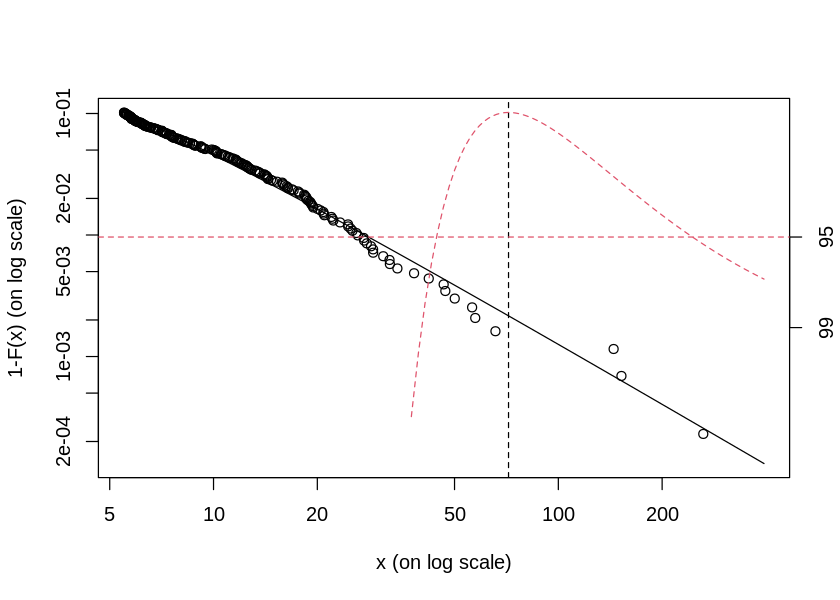

In [ ]:
options(repr.plot.width=7, repr.plot.height=5)

gpd.sfall(tailplot(fit), 0.99, ci.p = 0.95)

# The values are the ES: